In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 208s 18us/step


In [4]:
# 处理一下数据
training_images = training_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

training_images, test_images = training_images / 255.0, test_images / 255.0
# print(test_images) # one-hot code



In [5]:
# 定义模型lenet
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), activation='tanh', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (5,5), activation='tanh'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='tanh'),
    tf.keras.layers.Dense(84, activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [6]:
# keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=SGD(lr=0.05, decay=1e-6, momentum=0.9, nesterov=True), 
             metrics=['acc'])

# fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1)
history = model.fit(training_images, training_labels, batch_size=32, epochs=10, verbose=1, shuffle=True, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1429 - acc: 0.9563 - val_loss: 0.0866 - val_acc: 0.9725
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0702 - acc: 0.9783 - val_loss: 0.0629 - val_acc: 0.9809
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0557 - acc: 0.9829 - val_loss: 0.0514 - val_acc: 0.9837
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0445 - acc: 0.9862 - val_loss: 0.0656 - val_acc: 0.9793
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0393 - acc: 0.9877 - val_loss: 0.0618 - val_acc: 0.9828
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0359 - acc: 0.9879 - val_loss: 0.0661 - val_acc: 0.9821
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0340 - acc: 0.9887 - val_loss: 0.0631 - val_acc: 0.9819
Epoch 8/10
1875/1875 [==============================] -

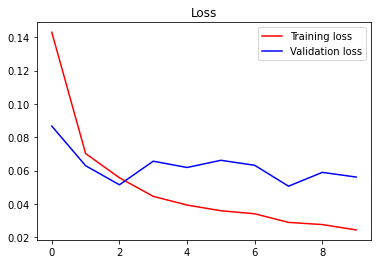

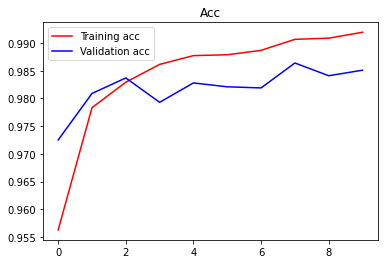

In [7]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Loss")
plt.legend()


plt.figure()
plt.plot(epochs, acc, 'r', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title("Acc")
plt.legend()

plt.show()